<span style="font-size:24px;">**Predicting Usage of PlaiCraft**</span>

<span style="font-size:18px;">**Introduction**</span>

A current research study is collecting data on how people play video games on a Minecraft server. The research group conducting this study needs to maximize their recruitment efforts so that they have enough data for their specific research; thus, they have proposed a couple of questions that we, as data science students, will explore and try to answer using our knowledge and the application of data science itself. The question we chose to focus on was, “Which 'kinds' of players are most likely to contribute a large amount of data?” In particular, we are going to use data science to predict whether the age and experience level of participants in the study will influence how much time they spend on the server (i.e how much data they contribute). 

<span style="font-size:18px;">**Our Question**</span>

Can the age and experience level of participants influence how much time is spent on the server? 

<span style="font-size:18px;">**Relevancy to Researcher's Proposed Question**</span>

Our question is relevant to the researcher's proposed question as it will answer who/which kind of players will most likely contribute to a large amount of data (i.e who will play the most). Age is a huge factor in how a person spends their free time, meaning how much time they spend playing video games. Additionally, although Minecraft is suitable for a large age range, it may strike to some age groups more than another. As for experience level, this is also a large factor in how an individual contributes to the data. For instance, beginners may be uninterested in the game as they have little knowledge of the game itself, while veterans, those considered experts, may strive to try something new rather than something they are very familiar with. These two variables can play a huge role in how an individual may contribute to the research data. Thus, by visualizing and building a classification model used to predict this contribution, researchers will know who to target in their recruitment to maximize their data for their research.

<span style="font-size:18px;">**The Data**</span>



Within this video game research data, there are **two main datasets**:
 
1. **Players.csv** dataset describes general summative information about each participant. The dataset includes 9 columns (variables) and 196 rows (observations). The table below describes each variable within the data set:


| Variable | Type of Variable | Description |
|----------|----------|----------|
| hashedEmail   | character variable (chr) | Participant’s email in unique character code |
| experience	| character variable (chr) | Participant’s previous Minecraft experience |
| subscribe	| logical variable (lgl) | If participant is subscribed to PlaiCraft’s email updates |
| played_hours	| double variable (dbl) | Number of hours played by each participant |
| name	| character variable (chr) | Name of participant |
| gender	| character variable (chr) | Gender of participant |
| age   | double variable (dbl) | Age of participant |
| individualID	| logical variable (lgl) | ID of participant |
| organizationName	| logical variable (lgl) | Organization of participant |


2. **Sessions.csv** focuses on each participant’s play time sessions.  This dataset includes 5 columns (variables) and currently 1535 rows (observations). Below describes each variable within the data set:
 
| Variable | Type of Variable | Description |
|----------|----------|----------|
| hashedEmail   | character variable (chr) | Participant’s email in unique character code |
| start_time	| character variable (chr) | Date and start time of a play session for each participant |
| end_time	| character variable (chr) | Date and end time of a play session for each participant |
| original_start_time	| double variable (dbl) | Scheduled start time in seconds since January 1st, 1970 |
| original_end_time	| double variable (dbl) | Scheduled end time in seconds since January 1st, 1970 |


In this report, we will be using **dataset #1**, although both can be important; our question requires further analysis of dataset #1, **players.csv**. Before we begin using the dataset, let's evaluate some potential issues with the selected data set. 

Potential Issues within this dataset:

    - Experience variable should be stored as a factor variable since it refers to a specific set of catergories
    - IndividualID & OrganizationName are missing values, thus unclear if these variables are signficant
    - Age of participants may be unaccurate as participant's could give false information
    - Privacy concerns regarding participant's name and email
    - Only 196 rows of observations, very limited dataset

<span style="font-size:18px;">**Beginning Our Analysis**</span>

Before we begin using our dataset to predict and answer our question at hand. We first need to do the necessary steps to load in our data and tidy it up so our functions recognize and can use it.

Let's begin by reading/loading in our data. Before that, let's load the necessary packages that have the functions we can use to actually read in our data.

In [1]:
### Run this cell before continuing. These library packages in R give us functions we can us
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(tidyr)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Now we can read in our dataset.

In [2]:
#Since our dataset comes from a url link, we must read it in this way.
url_1 <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players_data <- read_csv(url_1)
players_data

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA


Referring back to our question, we want the specific columns **age**, **experience**, and **played_hours**. So let's select these specific columns and name our new data set **players_data_selected**.

In [3]:
players_data_selected <- players_data |>
    select(age, experience, played_hours)
players_data_selected

age,experience,played_hours
<dbl>,<chr>,<dbl>
9,Pro,30.3
17,Veteran,3.8
17,Veteran,0.0
⋮,⋮,⋮
17,Amateur,0.0
17,Amateur,2.3
91,Pro,0.2


To answer our question, we will be using the KNN classification model with the **players_data_selected** data frame. Where age and experience levels will act as our predictors and played_hours will be our response variable. But before we do so, we must perform the necessary steps to wrangle our data, so that it can be effectively used in our classification model.   

In [4]:
#To be able to use age and experience as predictors, we must ensure the data type is of numerical value. 
#Thus, we will change experience to be a numerical variable.
players_data_2 <- players_data_selected |>
  mutate(experience_num = as.numeric(factor(experience, 
                                               levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran"),
                                               ordered = TRUE)))
players_data_2

age,experience,played_hours,experience_num
<dbl>,<chr>,<dbl>,<dbl>
9,Pro,30.3,4
17,Veteran,3.8,5
17,Veteran,0.0,5
⋮,⋮,⋮,⋮
17,Amateur,0.0,2
17,Amateur,2.3,2
91,Pro,0.2,4


As we can see from the data frame created, players with experience levels as *Beginner, Amateur, Regular, Pro and Veteran* are labelled as *1, 2, 3, 4, and 5*, respectively. Since we want played_hours as our predictor, we must turn played_hours from a double (dbl) variable to a factor (fct) variable. To do so, we will factor and classify played_hours into **low, medium and high** contributors. 

In [5]:
#Let's find the average played hours throughout all participants regardless of experience level and age. 
#This allows us to understand how we can classify played_hours into "low, medium and high" contributors.
avg_hours <- players_data_2 |>
    summarise(average_played_hours = mean(played_hours, na.rm = TRUE))
avg_hours

average_played_hours
<dbl>
5.845918


Since our average played hours is ~5.8 hours, we can now define our distribution classifications. Let's assume anything below 1 hour is considered a "low" contribution, between 1 and 6 hours is a "medium" contribution, and anything above 6 hours will be a "high" contribution. 

In [6]:
#Let us first visualize this distribution through a summarized table.
played_hours_distribution <- players_data_2 |>
  mutate(played_hours_category = case_when(
    played_hours < 1 ~ "low",
    played_hours >= 1 & played_hours <= 6 ~ "medium",
    played_hours > 6 ~ "high")) |>
  group_by(played_hours_category) |>
  summarise(count = n())
played_hours_distribution

played_hours_category,count
<chr>,<int>
high,14
low,154
medium,28


As we can see, there are a lot more "low" contribution players rather than high or medium. Let's now add this classification into our data frame as a factor variable.

In [7]:
#In addition, to add this new classification column of played_hours into our data frame, 
#we must convert it to a factor variable (as mentioned) in order to use it for our KNN classification model.

data_classified <- players_data_2 |>
  mutate(played_hours_class = case_when(
    played_hours < 1 ~ "low",
    played_hours >= 1 & played_hours <= 6 ~ "medium",
    played_hours > 6 ~ "high")) |>
    mutate(played_hours_class = as.factor(played_hours_class))
data_classified

age,experience,played_hours,experience_num,played_hours_class
<dbl>,<chr>,<dbl>,<dbl>,<fct>
9,Pro,30.3,4,high
17,Veteran,3.8,5,medium
17,Veteran,0.0,5,low
⋮,⋮,⋮,⋮,⋮
17,Amateur,0.0,2,low
17,Amateur,2.3,2,medium
91,Pro,0.2,4,low


Before we perform our data analysis, we will first create visualizations of the dataset above. This will give us an idea of how each variable correlates to one another before conducting any modelling. Additionally, this allows us to understand the relatioship between the variables and if they have any correlation at all.

In [8]:
#To create a bar plot showing the correlation between age and hours played, we will first turn the age(dbl) into 
#categories: Child (0-15 years), Youth (15-24 years), Adult (24-64 years) and Senior (65+)
age_class_data <- data_classified |>
  mutate(age_groups= case_when(
    age < 15 ~ "Child",
    age >= 15 & age <= 24 ~ "Youth",
    age > 24 & age <= 64 ~ "Adult",
    age > 64 ~ "Senior")) |>
    mutate(age_groups = factor(age_groups, levels = c("Child", "Youth", "Adult", "Senior")))
age_class_data

age,experience,played_hours,experience_num,played_hours_class,age_groups
<dbl>,<chr>,<dbl>,<dbl>,<fct>,<fct>
9,Pro,30.3,4,high,Child
17,Veteran,3.8,5,medium,Youth
17,Veteran,0.0,5,low,Youth
⋮,⋮,⋮,⋮,⋮,⋮
17,Amateur,0.0,2,low,Youth
17,Amateur,2.3,2,medium,Youth
91,Pro,0.2,4,low,Senior


In [9]:
#We will now calculate the average number of hours played according to each age group
library(dplyr)
age_group_summary <- age_class_data |>
  group_by(age_groups) |>
  summarize(avg_played_hours = mean(played_hours, na.rm = TRUE))
age_group_summary

age_groups,avg_played_hours
<fct>,<dbl>
Child,7.857143
Youth,6.400610
Adult,1.773913
Senior,0.150000


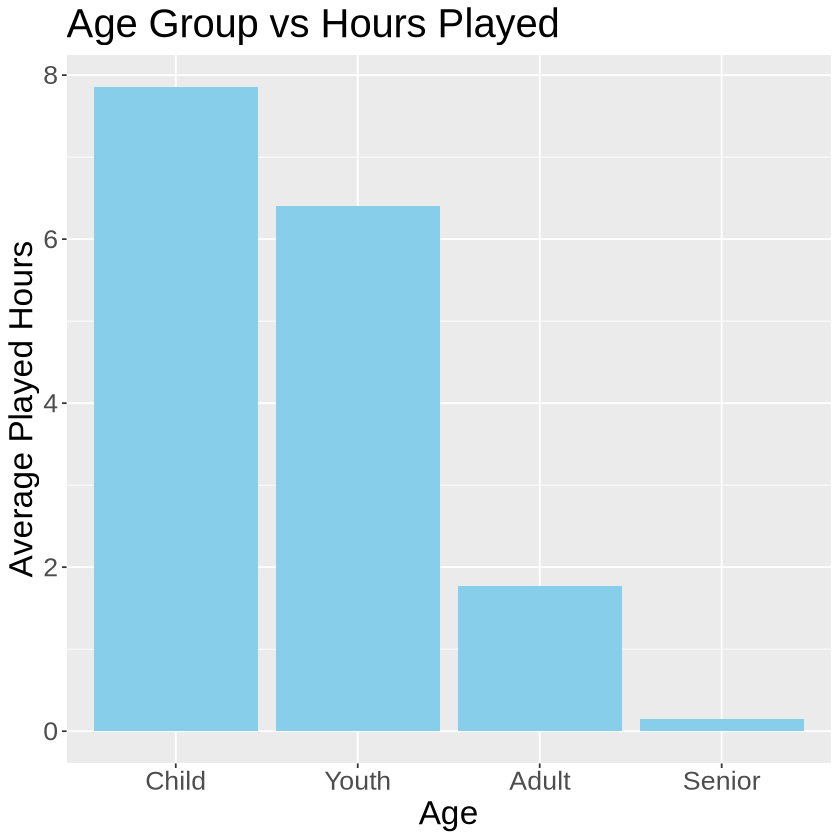

In [10]:
#We will now create a bar plot visualizations to see which age group spends the most time on PLAICraft
age_playtime<-age_group_summary |>
    ggplot(aes(x=age_groups, y=avg_played_hours)) +
    geom_bar(stat="identity", fill = "skyblue") +
    labs(x="Age", y="Average Played Hours", title="Age Group vs Hours Played") +
    theme(text = element_text(size = 20)) 

age_playtime

Figure 1.1: Exploratory plot of which age groups contribute the most play time in hours. 

The bar graph above shows that children (ages 0-15) spend the most time on PLAICraft, the average being 7.85 hours. This is followed by youth (6.40 hours), adults (1.77), and seniors with the least (0.15). This visual shows us that children and youth, or people aged 0-24, spend the most time on this video game. We will now conduct a similar visualization but with experience instead of age.  

In [11]:
#We will first convert experience from a character to a factor
experience_class_data <- data_classified |>
    mutate(experience = as_factor(experience))|>
    mutate(experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")))

experience_class_data

age,experience,played_hours,experience_num,played_hours_class
<dbl>,<fct>,<dbl>,<dbl>,<fct>
9,Pro,30.3,4,high
17,Veteran,3.8,5,medium
17,Veteran,0.0,5,low
⋮,⋮,⋮,⋮,⋮
17,Amateur,0.0,2,low
17,Amateur,2.3,2,medium
91,Pro,0.2,4,low


In [12]:
#Now we will calculate the average played hours per experience level
library(dplyr)
experience_level_summary <- experience_class_data |>
  group_by(experience) |>
  summarize(avg_played_hours = mean(played_hours, na.rm = TRUE))
experience_level_summary

experience,avg_played_hours
<fct>,<dbl>
Beginner,1.2485714
Amateur,6.0174603
Regular,18.2083333
Pro,2.6000000
Veteran,0.6479167


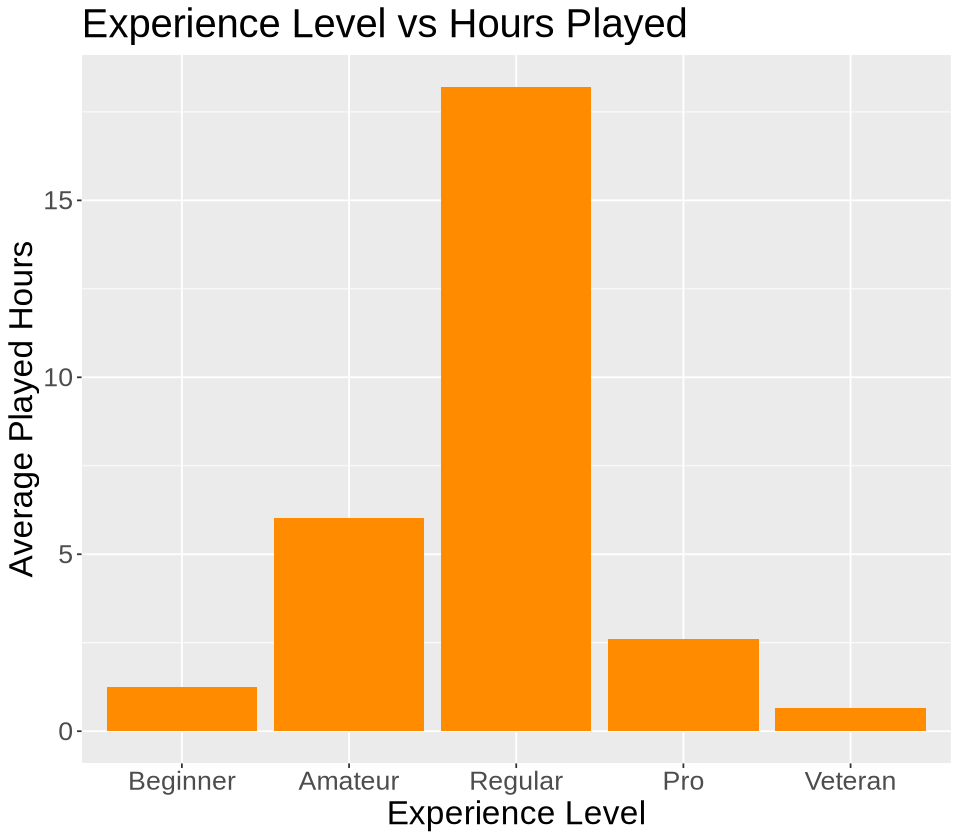

In [23]:
#Finally we are ready to plot our data
experience_playtime <- experience_level_summary |>
    ggplot(aes(x=experience, y=avg_played_hours)) +
    geom_bar(stat="identity", fill = "darkorange") +
    labs(x="Experience Level", y="Average Played Hours", title="Experience Level vs Hours Played")+
    theme(text = element_text(size = 20))

experience_playtime

Figure 1.2: Exploratory plot of which experience levels contribute most to play time in hours.

The data displayed in the bar graph above resembles a bell curve. Players with a regular or medium level of experience tend to spend the most time on PLAICraft. With beginners and veterans showing the least amount of played hours, one could deduce that this video game is not well suited for beginners and possibly too simple for veterans. Now that we have created visuals of the dataset, we will continue with data analysis.

<span style="font-size:18px;">**Building Our Classification Model**</span>

To begin our KNN classification, we initially split our data using a 0.80 proportion to analyze for our model. This means that 80% of our data will be used to train the model, and the remaining 20% will be used to test the model's prediciton accuracy.

In [14]:
set.seed(2019)
players_split <- initial_split(data_classified, prop = .80, strata = played_hours_class)
players_train <- training(players_split)
players_test <- testing(players_split)
players_train
players_test

age,experience,played_hours,experience_num,played_hours_class
<dbl>,<chr>,<dbl>,<dbl>,<fct>
9,Pro,30.3,4,high
17,Veteran,0.0,5,low
21,Amateur,0.7,2,low
⋮,⋮,⋮,⋮,⋮
26,Amateur,1.0,2,medium
17,Pro,1.7,4,medium
17,Amateur,2.3,2,medium


age,experience,played_hours,experience_num,played_hours_class
<dbl>,<chr>,<dbl>,<dbl>,<fct>
17,Veteran,0.0,5,low
22,Amateur,0.0,2,low
17,Amateur,0.5,2,low
⋮,⋮,⋮,⋮,⋮
20,Amateur,0.0,2,low
22,Veteran,0.3,5,low
91,Pro,0.2,4,low


Now, we will create a recipe for our prediction model that tells us we want to predict **played_hours_class** by **age** and **experience_num** variables. Additionally, we will scale our predictors so all observations are taken to account equally as possible.

In [15]:
set.seed(2019)
players_recipe <- recipe(played_hours_class ~ age + experience_num, data = players_train)|>
    step_scale(all_predictors()) |>
    step_center(all_predictors())
players_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



Before we begin performing our prediction, we know KNN predicts classifications based on a new observation's distance from its surrounding neighbours. However, an optimal number of neighbours should be used to ensure the most accurate classification that also maximizes the performance of our classifier that it hasn't seen yet; thus, we need to find that optimal K value. We begin by creating a model specification using tuning as our neighbours since we want to find this value. Additionally, we will perform a 5-fold cross-validation on the training set, this splits our training data once again. These multiple splits allow a more robust estimate of accuracy which will lead to the best and most optimal number of neighbours (K). Nex,t we will create a workflow analysis using the **players_recipe** from above and try K values from 2-10. We will then collect the metrics from the workflow analysis and create a plot to identify the best K value.

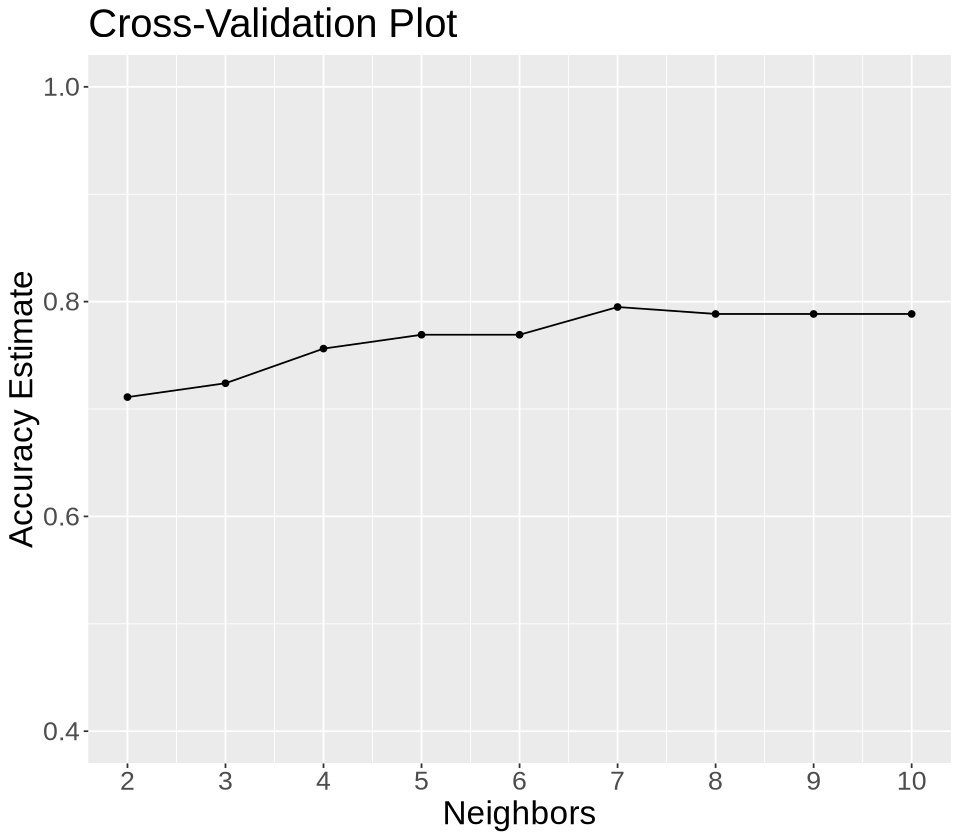

In [16]:
#We begin by setting a seed to ensure data is reproducible. 
options(repr.plot.height = 7, repr.plot.width = 8)
set.seed(2019) 

knn_spec_training <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

k_values <- tibble(neighbors = seq(from = 2, to = 10, by = 1))

training_vfold <- vfold_cv(players_train, v = 5, strat = played_hours_class)

knn_training_results <- workflow() |>
       add_recipe(players_recipe) |>
       add_model(knn_spec_training) |>
       tune_grid(resamples = training_vfold, grid = k_values) |>
       collect_metrics()

training_accuracies <- knn_training_results |> 
       filter(.metric == "accuracy")

cross_val_plot <- ggplot(training_accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate", title = "Cross-Validation Plot") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) + 
       scale_y_continuous(limits = c(0.4, 1.0)) +
       theme(text = element_text(size = 20))
cross_val_plot

This shows our most optimal k value is 7 as it has the highest estimated accuracy compared to the rest of the K values.

Now that we have found the optimal K value, we will create model specifications for our KNN classification. This includes specifying the optimal K that we saw above. Further, we will fit our data using age and experience levels as predictors and played_hours as our response variable, once again.

In [17]:
#We will be using a K (neighbours) value of 7, and the same recipe we created above.
set.seed(2019)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_spec

players_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  fit(data = players_train)
players_fit

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 7
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(7,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2115385
Best kernel: rectangular
Best k: 7

<span style="font-size:18px;">**Testing Our Model**</span>

Using our model above, **players_fit** and our testing data set, **players_test**, let's test the accruacy of our predictions.

In [18]:
set.seed(2019)
players_test_predictions <- predict(players_fit, players_test) |>
  bind_cols(players_test)

players_test_predictions

.pred_class,age,experience,played_hours,experience_num,played_hours_class
<fct>,<dbl>,<chr>,<dbl>,<dbl>,<fct>
low,17,Veteran,0.0,5,low
low,22,Amateur,0.0,2,low
low,17,Amateur,0.5,2,low
⋮,⋮,⋮,⋮,⋮,⋮
low,20,Amateur,0.0,2,low
low,22,Veteran,0.3,5,low
low,91,Pro,0.2,4,low


As we can see, our predictor predicts all classes as low when the actual class is low. This showcases a pretty accurate prediction model. However, let's further evaluate and find the true estimate of our model's prediction accuracy.

In [19]:
set.seed(2019)
players_predictions_accuracy <- players_test_predictions |>
  metrics(truth = played_hours_class, estimate = .pred_class) |>
  filter(.metric == "accuracy")
players_predictions_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.775


This shows that our model has an estimated accuracy of 77.5% on the test data, meaning our model may not be the most accurate when it comes to predicting unseen data. To further evaluate, let's take a look at the confusion matrix, which helps tell us about our model and the type of mistakes it may be making. 

In [20]:
confusion <- players_test_predictions |>
             conf_mat(truth = played_hours_class, estimate = .pred_class)
confusion

          Truth
Prediction high low medium
    high      0   0      0
    low       2  31      7
    medium    0   0      0

This confusion matrix tells us that our classification made a few mistakes, like classifying 7 mediums as low, and two high as low. We can continue to learn about how effective the classification is by calculating the accuracy, precision, and recall from values in the above table. 

In [21]:
#accuracy = (number of correct predictions)/(total number of predictions)  
accuracy <- (31)/(2 + 31 + 7)
accuracy

#precision = (number of correct positive predictions)/(total number of positive predictions) 
precision <- (31)/(31)
precision

#recall = (number of correct positive predictions)/(total number of positive test set observations)
recall <- (31)/(31)
recall

[1] 0.775

[1] 1

[1] 1

Thus, the accuracy is 0.775, the precision is 1, and the recall is 1. 

Now that we have created our model, let's put it to the test and answer our question. Recall that we wanted to know if the age and experience level can influence how much time a player contributes to the research data (i.e. on the server). Let's create a new tibble where the age of a participant is 15 and their experience level is regular which correlates to 3 on the experience_num scale. Next, let's predict what their contribution will be using our classification model.

In [22]:
new_played_hours <- tibble(age = 15, experience_num = 3)
played_hours_predicted <- predict(players_fit, new_played_hours)
played_hours_predicted

.pred_class
<fct>
low


As we can see, our classification model states that their contribution to the server will be low, meaning they will play for less than one hour. However, we must keep in mind that our model is only 77.5% accurate, which is also just an estimate. 

<span style="font-size:18px;">**Discussion**</span>

*Summary*

In the beginning, before applying our classification model, we visualized the relationships between the **age** and **experience** to **played_hours**, which showcased that ages 24 years old or younger and those with 'regular' experience levels were the ones who were most likely to contribute the most data. However, despite that initial visualization, our classification model tends to predict and classify new observations as low contributors regardless of the known relationships. This leads us to recognize that our model's prediction accuracy has room for improvement and does make mistakes. The estimated accuracy is 77.5%, which is not bad for this data since most known contributions are classed as low, so most of the predictions are correct. Although our initial visualizations allowed us to estimate how specific individuals would contribute to the research data, our classification model predicted differently. Also, the recall and precision are very high, which is good for this classification. 

*Expected? Why?*

Taking a look at our dataset, the results aren't at all surprising that most predictions will be classified as low. As mentioned in the beginning, the dataset is rather small and limited to that of 196 rows. This means that when we use our dataset to build our model, there isn't much data for it to be accurately built on. Additionally, taking a look at the raw set of data, it is notable that most players have very little contributed hours. This also means that our "low" contribution factor is very abundant compared to "medium" or "high". Consequently, since KNN predicts new observations on nearby neighbours, if our "low" contributor is extremely large, it may lead to inaccuracies in our prediction as it will influence our predictor due to its high abundance. Even if we scaled our data, it may not lead to a fair judgement that equally examines and evaluates all observations because of that large number of low contributors. This is one of the known downsides of KNN classification when one group is significantly larger than others and it may bias the final prediction. In conclusion, our results were as expected, considering these factors.

*Impact of Findings*

Although our findings are limited, we feel that it does have an impact to future evaluations of the data. For instance, as we mentioned above, low contributors were very abundant, meaning players who have contributed to the research data for less than 1 hour are very relevant. This may impact the researcher's studies as it showcases where a large accumulation of data lies in this specific category, which can lead to questions that discuss potential improvements to their server. Additionally, our visualizations of the relationships between age and experience to the played_hours may help researchers target certain individuals despite our classification model's predictions. Further, we found that most players are low contributors so this could impact findings as the researchers may take this information and try and find ways to increase overall play time. 

*Potential Future Questions*

Although our findings are very limited, this does bring up some potential future questions to be explored:

    - How can the researchers improve their server to bring in more players? (ex. updates? adding new features?, etc.)
    - Why are most players classified as low contributors? How can we raise their played_hours?
    - Is there a way to verify the experience category that participants must choose?
    - Can the researchers target regular players, as they contribute most to play time?